In [1]:
import geopandas as gpd
from shapely.geometry import Polygon, MultiPolygon, Point
from shapely.wkt import loads as load_wkt
from shapely.ops import unary_union

import pandas as pd
import numpy as np
import math

import glob
import os

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, SubplotDivider, Size
from mpl_toolkits.axes_grid1.mpl_axes import Axes
import matplotlib.ticker as mticker
import matplotlib as mpl

%matplotlib inline

In [2]:
path_to_results = '/mnt/c/education/HSI/aspirantura/CAMELS_ru/files/test/'

# get file names from folder
files = [fn for fn in glob.glob('{}/*.csv'.format(path_to_results))]

# store each file in personal DF
climate_df, geometry_df, hydro_df, landcover_df, physio_df, soil_geo_df, urban_df = [pd.read_csv(i) for i in files]

In [3]:
# transform to AEA projection
aea_crs = ccrs.AlbersEqualArea(central_longitude=100,
                               standard_parallels=(50, 70),
                               central_latitude=56,
                               false_easting=0,
                               false_northing=0)
# to proj4 form
aea_crs_proj4 = aea_crs.proj4_init

# transform geometry for central points of WS
geometry_df['geometry'] = [load_wkt(i) for i
                           in geometry_df['geometry']]
geometry_df = gpd.GeoDataFrame(geometry_df,
                               geometry=geometry_df['geometry'],
                               crs='epsg:4326')

geometry_df = geometry_df.to_crs(aea_crs_proj4)

geometry_df['centroids'] = gpd.GeoSeries([Point(i.centroid.coords) for i
                                          in geometry_df['geometry']],
                                         crs=aea_crs_proj4)

In [4]:
# get shapefile of Russia
russia_shape = gpd.read_file('/mnt/c/education/HSI/WR/Water_Resources/data/russia_forest_25people.geojson')

# select only two columns
russia_shape = russia_shape[['geometry']]

# transform gpd for Alberts Equal Area
russia_shape = russia_shape.to_crs(aea_crs_proj4)

df_for_plot = pd.concat([hydro_df[['gwt_cm_sav']],
                         physio_df[['ele_mt_sav']], 
                         urban_df[['urb_pc_sse']]], axis=1)

numerical_values = ['Groundwater Table Depth, cm', 
                   'Elevation, m',
                   'Urban Extent, %']

df_for_plot['geometry'] = geometry_df['centroids']
df_for_plot = gpd.GeoDataFrame(df_for_plot)

In [5]:
monthes = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
land_cover_classes = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']
natural_vegetation = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15']
wetland_classes = ['01', '02', '03', '04', '05', '06', '07', '08', '09']

In [27]:
def create_gdf_for_plot(df, geometry_df):
    pd.options.mode.chained_assignment = None
    df['geometry']= geometry_df['centroids']
    df = gpd.GeoDataFrame(df)
    
    return df

### ✓ hydro_df
### ✓ physio_df
### ✓ urban_df
### ✓ climate_df
### ✓ landcover_df

In [9]:
df_for_plot

,gwt_cm_sav,ele_mt_sav,urb_pc_sse,geometry
0,64.130435,154.072464,0.000000,POINT (-2733635.676 2134648.514)
1,71.417476,143.446602,0.058252,POINT (-2756491.859 2113545.784)
2,53.700000,61.300000,0.500000,POINT (-3233408.955 2200877.094)
3,107.615385,151.807692,0.000000,POINT (-3060905.808 2079161.081)
4,93.682927,116.317073,0.000000,POINT (-3068542.631 2094327.930)
5,53.933333,73.533333,0.000000,POINT (-3172948.211 2103045.723)
6,47.250000,58.250000,0.000000,POINT (-3228873.081 2186701.144)


In [10]:
df_for_plot['geometry']=geometry_df['centroids']

In [11]:
df_for_plot = pd.concat([hydro_df[['gwt_cm_sav']], 
                         climate_df[['clz_cl_smj']], 
                         landcover_df[['glc_cl_smj']], 
                         soil_geo_df[['lit_cl_smj']]])
                         
df_for_plot['geometry']=geometry_df['centroids']
df_for_plot = gpd.GeoDataFrame(df_for_plot)

AttributeError: 'Text' object has no property 'loc'

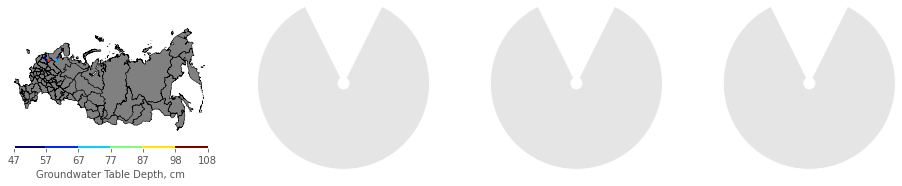

In [18]:
create_plot(N=6,
            basemap_gdf=russia_shape, 
            gdf_to_plot=df_for_plot, 
            columns_from_gdf=df_for_plot.columns[:-1], 
            colorbar_labels=numerical_values,
            folder_to_picture='/mnt/d/education/HSI/aspirantura/CAMELS_ru/test/images/',
            plot_name='gwd_elev_urban',)

In [20]:
test = create_gdf_for_plot(df=climate_df[['clz_cl_smj']],
                          geometry_df=geometry_df)

ValueError: Bin edges must be unique: array([7., 7., 7., 7., 7., 7., 7.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

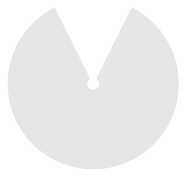

In [21]:
create_plot(N=6,
           basemap_gdf=russia_shape,
           gdf_to_plot=test,
           columns_from_gdf=test.columns[:-1],
           colorbar_labels=['Climate Zone'],
           folder_to_picture='/mnt/d/education/HSI/aspirantura/CAMELS_ru/test/images/',
           plot_name='test_image')

In [22]:
climate_plot = create_gdf_for_plot(df=climate_df[['pre_mm_s{}'.format(i) for i in monthes]],
                                   geometry_df=geometry_df)

AttributeError: 'Text' object has no property 'loc'

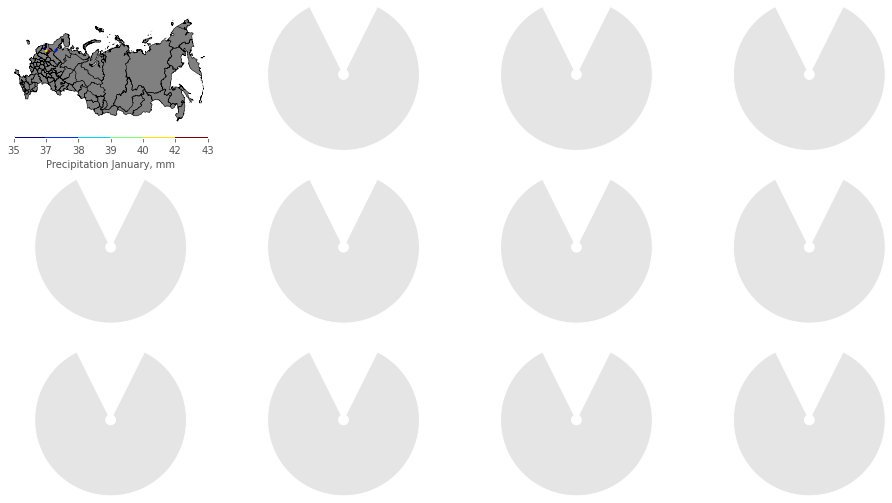

In [23]:
create_plot(N=6,
            basemap_gdf=russia_shape, 
            gdf_to_plot=climate_plot, 
            columns_from_gdf=climate_plot.columns[:-1], 
            colorbar_labels=['Precipitation January, mm',
                             'Precipitation February, mm',
                             'Precipitation March, mm',
                             'Precipitation April, mm',
                             'Precipitation May, mm',
                             'Precipitation June, mm',
                             'Precipitation July, mm',
                             'Precipitation August, mm',
                             'Precipitation September, mm',
                             'Precipitation October, mm',
                             'Precipitation November, mm',
                             'Precipitation December, mm'],
            folder_to_picture='/mnt/d/education/HSI/aspirantura/CAMELS_ru/test/images/',
            plot_name='climate_prec',)

In [158]:
landcover_plot = create_gdf_for_plot(df=landcover_df[['for_pc_sse',
                                                      'crp_pc_sse',
                                                      'pst_pc_sse',
                                                      'ire_pc_sse',
                                                      'gla_pc_sse',
                                                      'prm_pc_sse']],
                                     geometry_df=geometry_df)

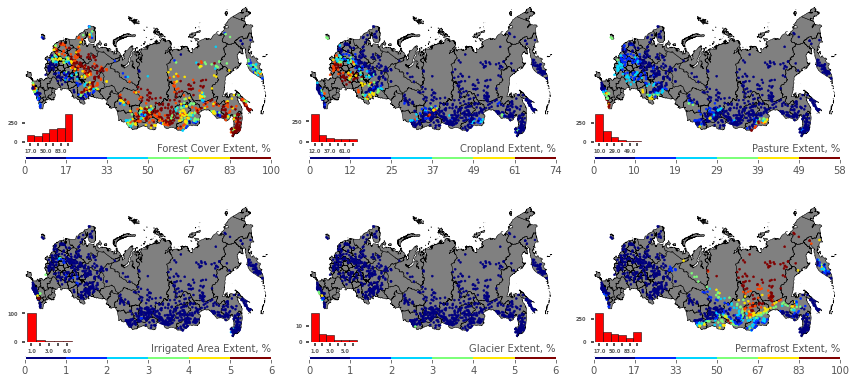

In [164]:
create_plot(N=6,
            basemap_gdf=russia_shape, 
            gdf_to_plot=landcover_plot, 
            columns_from_gdf=landcover_plot.columns[:-1], 
            colorbar_labels=['Forest Cover Extent, %',
                             'Cropland Extent, %',
                             'Pasture Extent, %',
                             'Irrigated Area Extent, %',
                             'Glacier Extent, %',
                             'Permafrost Extent, %'],
            folder_to_picture='/mnt/d/education/HSI/aspirantura/CAMELS_ru/test/images/',
            plot_name='land_pc',)

In [168]:
soil_geo_plot = create_gdf_for_plot(df=soil_geo_df[['cly_pc_sav',
                                                      'slt_pc_sav',
                                                      'snd_pc_sav',
                                                      'soc_th_sav',
                                                      'kar_pc_sse',
                                                      'ero_kh_sav']],
                                     geometry_df=geometry_df)

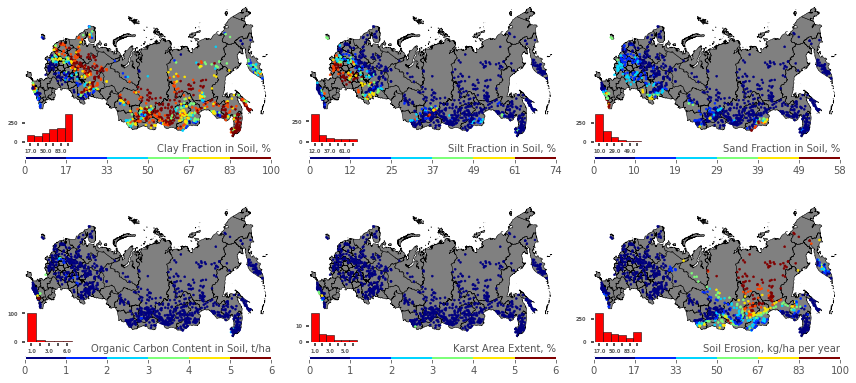

In [169]:
create_plot(N=6,
            basemap_gdf=russia_shape, 
            gdf_to_plot=landcover_plot, 
            columns_from_gdf=landcover_plot.columns[:-1], 
            colorbar_labels=['Clay Fraction in Soil, %',
                             'Silt Fraction in Soil, %',
                             'Sand Fraction in Soil, %',
                             'Organic Carbon Content in Soil, t/ha',
                             'Karst Area Extent, %',
                             'Soil Erosion, kg/ha per year'],
            folder_to_picture='/mnt/d/education/HSI/aspirantura/CAMELS_ru/test/images/',
            plot_name='soil_geo_pc',)

In [17]:
def create_plot(N, basemap_gdf, 
                gdf_to_plot, 
                columns_from_gdf, 
                colorbar_labels,
                folder_to_picture,
                plot_name):
    
    plt.style.use('ggplot')
    
    def roundup(x):
#         return int((int(x) + 9) // 10 * 10)
        return round(x, 0)

    ncols = len(columns_from_gdf)//3
    if ncols == 0:
        ncols = 1
    else:
        pass
    
    nrows = len(columns_from_gdf)//ncols
    
    if ncols >= nrows:
        pass
    else:
        ncols, nrows = nrows, ncols
        
    
    fig, axes = plt.subplots(ncols=ncols, 
                             nrows=nrows,
                             figsize=(ncols*4, nrows*3),
                             subplot_kw={'projection': aea_crs})  
    
    for i, ax in enumerate(np.ravel(axes)):
        
        norm = mpl.colors.Normalize(vmin=0, vmax=N)
        cmap = mpl.cm.get_cmap('jet')
        
        vmin, vmax = gdf_to_plot[columns_from_gdf[i]].min(), gdf_to_plot[columns_from_gdf[i]].max()
        
        split = (gdf_to_plot[columns_from_gdf[i]].max() - gdf_to_plot[columns_from_gdf[i]].min())/6
        
        list_of_limits = [gdf_to_plot[columns_from_gdf[i]].min() + split * j for j in range(N+1)]

        list_of_limits = [roundup(j) for j in list_of_limits]
        
        hist_df = pd.crosstab(gdf_to_plot[columns_from_gdf[i]], pd.cut(gdf_to_plot[columns_from_gdf[i]], list_of_limits))
        hist_df = hist_df.reset_index(drop=True)

        hist_df.columns = [str(j.right) for j in hist_df.columns]
        
        if len(hist_df.columns) > 3:
            new_index = list()
            for j, name in enumerate(hist_df.columns.to_list()):
                if j % 2 == 0:
                    new_index.append(name)
                else:
                    new_index.append("")
                    
            hist_df.columns = new_index
        else:
            pass
        
        list_of_colors = [cmap(norm(j)) for j in range(len(list_of_limits))]

        my_cmap = mpl.colors.ListedColormap(list_of_colors, name='my_colormap_name')
            
        # plot settings
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_extent([50, 140, 32, 90])
        # plot russia
        basemap = basemap_gdf.plot(ax=ax, color='grey', edgecolor='black', legend=False)
        # plot variable

        divider = make_axes_locatable(ax)
        ax_cb = divider.append_axes('bottom', 
                                    size="2%", 
                                    pad=0.01, 
                                    axes_class=plt.Axes)

        scatter_plot = gdf_to_plot.plot(ax=ax, column=columns_from_gdf[i], cmap = my_cmap, marker='o', markersize=4)

        norm = mpl.colors.BoundaryNorm(list_of_limits, my_cmap.N)
        cbr = fig.colorbar(mpl.cm.ScalarMappable(cmap=my_cmap, norm=norm),
                           cax=ax_cb,
                           pad=0.01,
                           orientation='horizontal',
                           ticks=list_of_limits,
                           spacing='uniform')
        cbr.ax.tick_params(labelsize=10)
        ax_cb.set_xlabel(colorbar_labels[i], size=10, loc='right')
        cbr.ax.xaxis.set_label_position('top')


        # x of borders, y of borders, height, weight
        ax_hist = ax.inset_axes([0.00, 0.09, 0.2, 0.2])
        
        extra_hist = hist_df.sum(axis=0).plot.bar(ax=ax_hist,
                                                   rot=0,
                                                   width=1.0,
                                                   facecolor='red',
                                                   edgecolor='black')

        
        extra_hist.set_facecolor('white')
        extra_hist.tick_params(width=2)
        plt.setp(ax_hist.get_xticklabels(), 
                 fontsize=5, 
                 fontweight="bold")
        plt.setp(ax_hist.get_yticklabels(), 
                 fontsize=5, 
                 fontweight="bold")
        
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                        hspace = 0, wspace = 0)
    plt.margins(0,0)
    
    plt.tight_layout()
    
    
    if not os.path.exists(folder_to_picture):
        os.makedirs(folder_to_picture)

    fig.savefig(folder_to_picture + '{}.jpeg'.format(plot_name),
                dpi=200,
#                 format='svg',
                orientation ='landscape')

    plt.show()

    return

In [15]:
# def create_plot(basemap_gdf, 
#                 gdf_to_plot, 
#                 columns_from_gdf, 
#                 colorbar_labels,
#                 folder_to_picture,
#                 plot_name):
    
#     plt.style.use('ggplot')
    
#     def roundup(x):
# #         return int((int(x) + 9) // 10 * 10)
#         return int(x)
    
#     nrows = len(columns_from_gdf)//3
#     ncols = len(columns_from_gdf)//nrows
    
#     fig, axes = plt.subplots(ncols=ncols, 
#                              nrows=nrows,
#                              figsize=(18, 5),
#                              subplot_kw={'projection': aea_crs})  
    
#     for i, ax in enumerate(np.ravel(axes)):
        
#         norm = mpl.colors.Normalize(vmin=0, vmax=N)
#         cmap = mpl.cm.get_cmap('jet')
        
#         vmin, vmax = gdf_to_plot[columns_from_gdf[i]].min(), gdf_to_plot[columns_from_gdf[i]].max()
        
#         split = (gdf_to_plot[columns_from_gdf[i]].max() - gdf_to_plot[columns_from_gdf[i]].min())/6
        
#         list_of_limits = [gdf_to_plot[columns_from_gdf[i]].min() + split * j for j in range(N+1)]

#         list_of_limits = [roundup(j) for j in list_of_limits]
        
#         hist_df = pd.crosstab(gdf_to_plot[columns_from_gdf[i]], pd.cut(gdf_to_plot[columns_from_gdf[i]], list_of_limits))
#         hist_df = hist_df.reset_index(drop=True)

#         hist_df.columns = [str(j.right) for j in hist_df.columns]
        
#         if len(hist_df.columns) > 3:
#             new_index = list()
#             for j, name in enumerate(hist_df.columns.to_list()):
#                 if j % 2 == 0:
#                     new_index.append(name)
#                 else:
#                     new_index.append("")
                    
#             hist_df.columns = new_index
#         else:
#             pass
        
#         list_of_colors = [cmap(norm(j)) for j in range(len(list_of_limits))]

#         my_cmap = mpl.colors.ListedColormap(list_of_colors, name='my_colormap_name')
            
#         # plot settings
#         ax.set_aspect('equal')
#         ax.axis('off')
#         ax.set_extent([50, 140, 32, 90])
#         # plot russia
#         basemap = basemap_gdf.plot(ax=ax, color='grey', edgecolor='black', legend=False)
#         # plot variable

#         divider = make_axes_locatable(ax)
#         ax_cb = divider.append_axes('bottom', 
#                                     size="2%", 
#                                     pad=0.01, 
#                                     axes_class=plt.Axes)

#         scatter_plot = gdf_to_plot.plot(ax=ax, column=columns_from_gdf[i], cmap = my_cmap, marker='o', markersize=4)

#         norm = mpl.colors.BoundaryNorm(list_of_limits, my_cmap.N)
#         cbr = fig.colorbar(mpl.cm.ScalarMappable(cmap=my_cmap, norm=norm),
#                            cax=ax_cb,
#                            pad=0.01,
#                            orientation='horizontal',
#                            ticks=list_of_limits,
#                            spacing='uniform')
#         cbr.ax.tick_params(labelsize=10)
#         ax_cb.set_xlabel(colorbar_labels[i], size=10, loc='right')
#         cbr.ax.xaxis.set_label_position('top')


#         # x of borders, y of borders, height, weight
#         ax_hist = ax.inset_axes([0.00, 0.09, 0.2, 0.2])
        
#         extra_hist = hist_df.sum(axis=0).plot.bar(ax=ax_hist,
#                                                rot=0,
#                                                width=1.0,
#                                                facecolor='red',
#                                                edgecolor='black')

        
#         extra_hist.set_facecolor('white')
#         extra_hist.tick_params(width=2)
#         plt.setp(ax_hist.get_xticklabels(), 
#                  fontsize=6, 
#                  fontweight="bold")
#         plt.setp(ax_hist.get_yticklabels(), 
#                  fontsize=6, 
#                  fontweight="bold")
        
#     plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
#                         hspace = 0, wspace = 0)
#     plt.margins(0,0)
    
#     plt.tight_layout()
    
    
#     if not os.path.exists(folder_to_picture):
#         os.makedirs(folder_to_picture)

#     fig.savefig(folder_to_picture + '{}.jpeg'.format(plot_name),
#                 dpi=200,
# #                 format='svg',
#                 orientation ='landscape')

#     plt.show()

#     return

In [25]:
N=1

NameError: name 'gdf_to_plot' is not defined

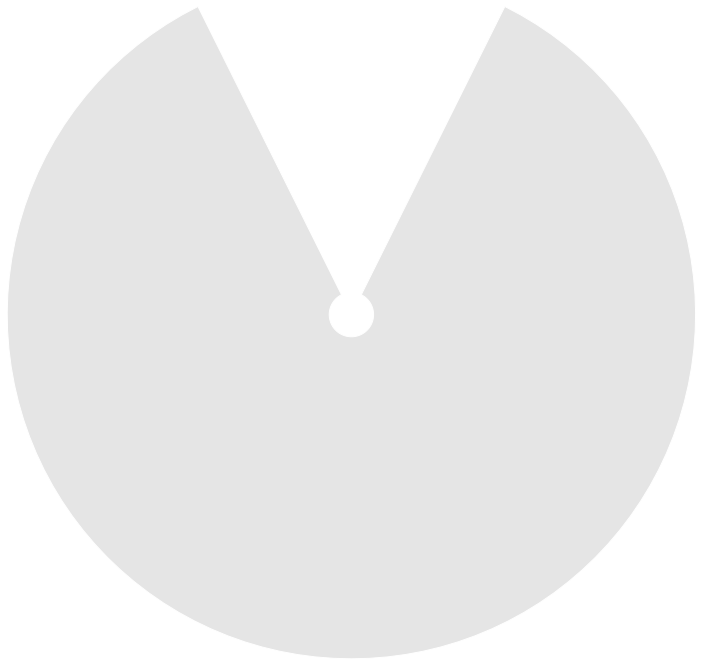

In [28]:
fig, ax = plt.subplots(figsize=(16, 12),
                        subplot_kw={'projection': aea_crs})

norm = mpl.colors.Normalize(vmin=0, vmax=N)
cmap = mpl.cm.get_cmap('jet')

vmin, vmax = gdf_to_plot[columns_from_gdf[i]].min(), gdf_to_plot[columns_from_gdf[i]].max()

split = (gdf_to_plot[columns_from_gdf[i]].max() - gdf_to_plot[columns_from_gdf[i]].min())/6

list_of_limits = [gdf_to_plot[columns_from_gdf[i]].min() + split * j for j in range(N+1)]

list_of_limits = [roundup(j) for j in list_of_limits]

list_of_colors = [cmap(norm(j)) for j in range(len(list_of_limits))]

my_cmap = mpl.colors.ListedColormap(list_of_colors, name='my_colormap_name')


#         for j, col in enumerate(row):

# plot settings
ax.set_aspect('equal')
ax.axis('off')
ax.set_extent([50, 140, 32, 90])
# plot russia
basemap = basemap_gdf.plot(ax=ax, color='grey', edgecolor='black', legend=False)
# plot variable

# divider = make_axes_locatable(ax)

# ax_hist = divider.append_axes('right', 
#                               size="10%",
#                               pad=0,
#                               axes_class=plt.Axes)


###########

# axes for colorbar

divider_cb = make_axes_locatable(ax)

ax_cb = divider_cb.append_axes('bottom', 
                            size="2%",
                            pad=0.01, 
                            axes_class=plt.Axes)

scatter_plot = gdf_to_plot.plot(ax=ax, column=columns_from_gdf[i], cmap = my_cmap, marker='o', markersize=8)



norm = mpl.colors.BoundaryNorm(list_of_limits, my_cmap.N)
cbr = fig.colorbar(mpl.cm.ScalarMappable(cmap=my_cmap, norm=norm),
                   cax=ax_cb,
                   pad=0.1,
                   orientation='horizontal',
                   ticks=list_of_limits,
                   spacing='uniform')

cbr.ax.tick_params(labelsize=14)
ax_cb.set_xlabel(colorbar_labels[i], size=16)
cbr.ax.xaxis.set_label_position('top')


hist_df = pd.crosstab(gdf_to_plot[columns_from_gdf[i]], pd.cut(gdf_to_plot[columns_from_gdf[i]], list_of_limits))
hist_df = hist_df.reset_index(drop=True)

hist_df.columns = [str(i.right) for i in hist_df.columns]

new_index = list()
for i, name in enumerate(hist_df.columns.to_list()):
    if i % 2 == 0:
        new_index.append(name)
    else:
        new_index.append("")
        
hist_df.columns = new_index

divider = SubplotDivider(fig, 6, 6, 25, aspect=True)
ax_hist = fig.add_axes(divider.get_position(), axes_class=plt.Axes, label="hist")

extra_hist = test.sum(axis=0).plot.bar(ax=ax_hist,
                                       rot=0,
                                       width=1.0,
                                       facecolor='red',
                                       edgecolor='black')
extra_hist.set_facecolor('white')
extra_hist.tick_params(labelsize=10, width=5)

fig.savefig('test.jpeg')